## Indice de Precios de Consumo (IPC) en México

Porcentaje de variación del IPC

- DataFrame --> df_IPC

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def limpieza_indicadores(root):
    "limpieza del fichero inicial de cada indicador económico. Base de datos del Banco Mundial"
    
    df = pd.read_csv(root, header=0)
    df.rename(columns={'Country Name':'country', 'Indicator Name':'variables' }, inplace=True)
    df = df[df.country == 'México']
    df['country'] = df['country'].replace('México', 'MEXICO')
    df = df.drop(['country', 'Country Code', 'Indicator Code'], axis=1)
    
    
    return df

In [3]:
root_IPC = "Variables_economicas/IPC.csv"
df_IPC = limpieza_indicadores(root_IPC)
df_IPC = df_IPC.round(2)
df_IPC = df_IPC.replace({'Inflación, precios al consumidor (% anual)': 'IPC(%anual)'})
df_IPC.set_index('variables', inplace=True)

df_IPC.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
IPC(%anual),9.75,6.97,35.0,34.38,20.63,15.93,16.59,9.49,6.37,5.03,...,3.41,4.11,3.81,4.02,2.72,2.82,6.04,4.9,3.64,NaN


In [5]:
df_IPC = df_IPC.transpose()

In [6]:
df_IPC.describe()

variables,IPC(%anual)
count,27.000000
mean,8.556296
std,8.752879
min,2.720000
25%,3.980000
50%,4.900000
75%,8.230000
max,35.000000


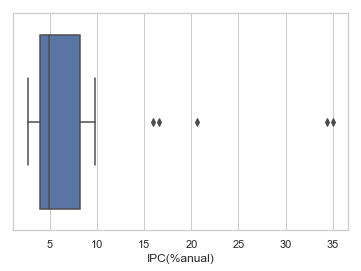

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_IPC["IPC(%anual)"])

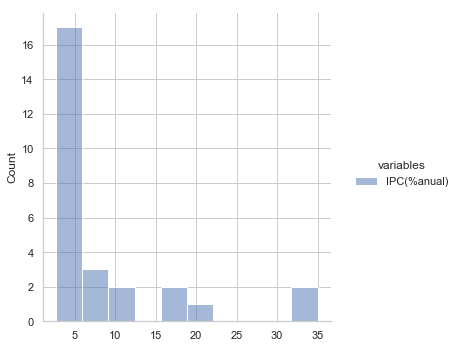

In [8]:
sns.displot(df_IPC, bins=10)

Text(0.5, 1.0, 'Evolución del IPC en México')

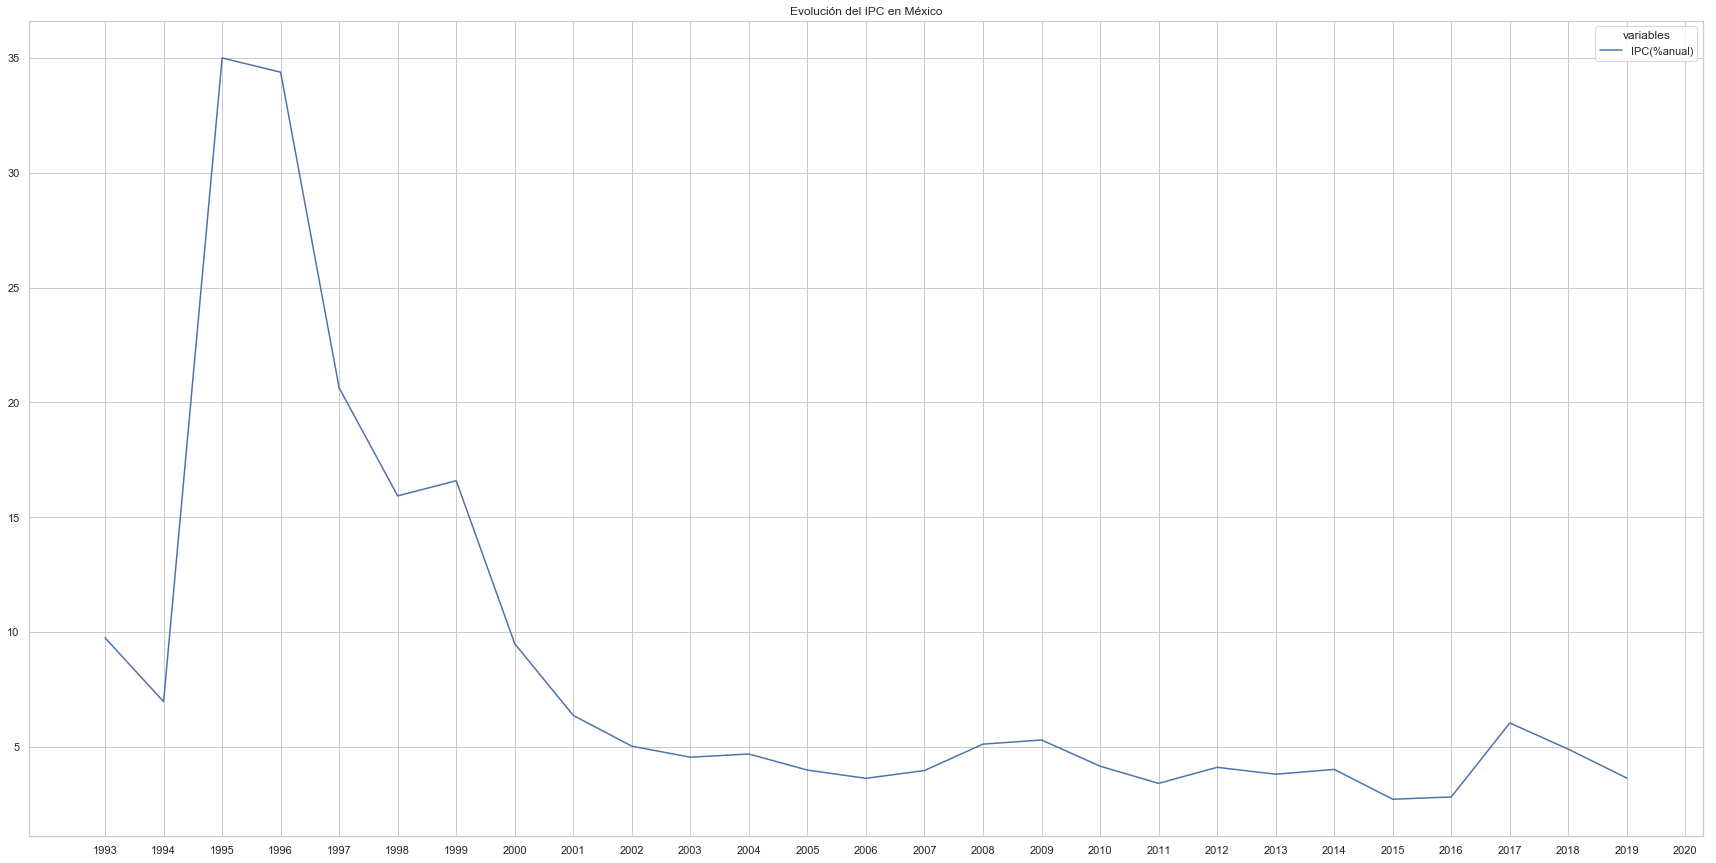

In [9]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df_IPC)
plt.title('Evolución del IPC en México')

In [10]:
df_IPC.sum()

variables
IPC(%anual)    231.02
dtype: float64

In [12]:
df_IPC.loc[df_IPC['IPC(%anual)'] == df_IPC['IPC(%anual)'].max()]

variables,IPC(%anual)
1995,35.0


In [13]:
%store df_IPC

Stored 'df_IPC' (DataFrame)
